In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [4]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
customers_scaled = StandardScaler().fit_transform(market_data_df)
# Display the arrays. 
customers_scaled[:5]


array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211],
       [ 0.02177396, -0.70633685, -0.02168042, -0.06103015,  0.00800452,
        -0.55024692, -0.28206051],
       [-0.04076438, -0.81092807,  0.24945797, -0.05038797, -0.37316402,
        -0.45825882, -0.29554614],
       [ 1.19303608,  2.00095907,  1.76061001,  0.54584206, -0.29120287,
        -0.49984776, -0.27031695]])

In [5]:
# Create a DataFrame with the scaled data
customers_scaled_df = pd.DataFrame(customers_scaled, columns=market_data_df.columns)


# Copy the crypto names from the original data
customers_scaled_df["coin_id"] = market_data_df.index


# Set the coinid column as index
customers_scaled_df = customers_scaled_df.set_index("coin_id")


# Display sample data
customers_scaled_df.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [6]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))


# Create an empty list to store the inertia values
inertia_k_val = []


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in k:
    model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    model.fit(customers_scaled_df)
    inertia_k_val.append(model.inertia_)


# Create a dictionary with the data to plot the Elbow curve
elbow_data_k_val = {"k": k, "inertia": inertia_k_val}


# Create a DataFrame with the data to plot the Elbow curve
elbow_k_val_df = pd.DataFrame(elbow_data_k_val)


# Display the DataFrame
elbow_k_val_df.head(10)


,k,inertia
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051
5,6,61.634088
6,7,46.074467
7,8,43.392694
8,9,32.913223
9,10,30.469111


<Axes: title={'center': 'Elbow Curve Using K Means'}, xlabel='k'>

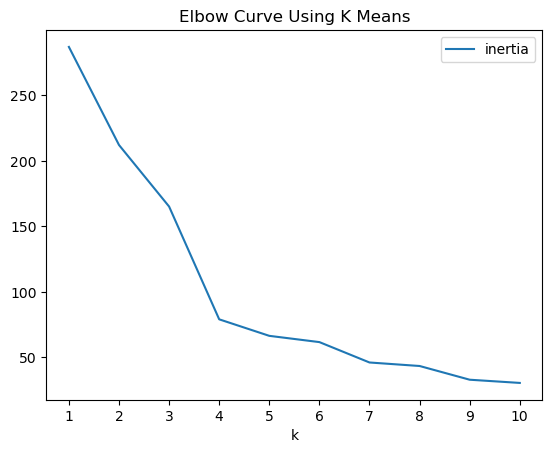

In [7]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_k_val_df.plot.line(
    x="k", 
    y="inertia", 
    xticks=k, 
    title="Elbow Curve Using K Means"
)


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** 4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [8]:
# Get the shape of the DataFrame
customers_scaled_df.shape

(41, 7)

In [9]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, n_init='auto', random_state=1)


In [10]:
# Fit the K-Means model using the scaled data
model.fit(customers_scaled_df)


KMeans(n_clusters=4, random_state=1)

In [11]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predictions = model.predict(customers_scaled_df)


# View the resulting array of cluster values.
predictions


array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0],
      dtype=int32)

In [12]:
# Create a DataFrame to see the mapping
result_df = pd.DataFrame({
    'Cryptocurrency': customers_scaled_df.index,
    'Cluster': predictions
})
print(result_df.head(41))

          Cryptocurrency  Cluster
0                bitcoin        2
1               ethereum        2
2                 tether        0
3                 ripple        0
4           bitcoin-cash        2
5            binancecoin        2
6              chainlink        2
7                cardano        2
8               litecoin        2
9        bitcoin-cash-sv        0
10      crypto-com-chain        0
11              usd-coin        0
12                   eos        0
13                monero        2
14                  tron        0
15                 tezos        2
16                   okb        0
17               stellar        0
18                cosmos        2
19                  cdai        0
20                   neo        0
21       wrapped-bitcoin        2
22             leo-token        0
23           huobi-token        0
24                   nem        0
25           binance-usd        0
26                  iota        0
27               vechain        0
28            

In [13]:
# Create a copy of the DataFrame
predicted_clustered_df = customers_scaled_df.copy()


In [14]:
# Add a new column to the DataFrame with the predicted clusters
predicted_clustered_df["class"] = model.labels_


# Display sample data
predicted_clustered_df.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,class
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


<Axes: title={'center': 'Clusters of Cryptocurrencies'}, xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

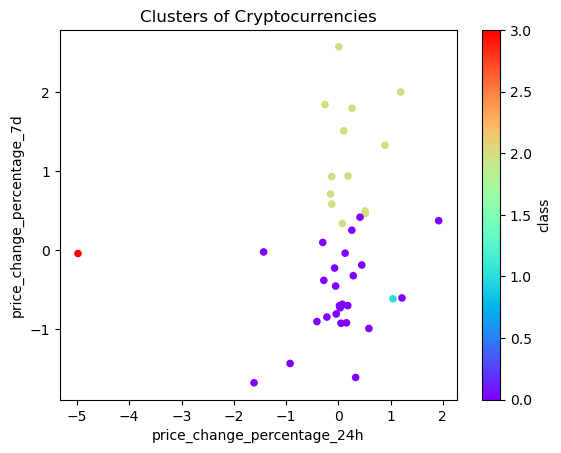

In [15]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
predicted_clustered_df.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="class",
    colormap="rainbow",
    title="Clusters of Cryptocurrencies"
)


### Optimize Clusters with Principal Component Analysis.

In [16]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)


In [17]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
crypto_pca = pca.fit_transform(customers_scaled_df)


# View the first five rows of the DataFrame. 
crypto_pca[:5]


array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [18]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca.explained_variance_ratio_


array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 89.5% (Get the total of the array and show it in percentage = .372 + .347 + .176)

In [19]:
# Create a new DataFrame with the PCA data.
pca_df = pd.DataFrame(
    data=crypto_pca, columns=["PCA1", "PCA2", "PCA3"]
)


# Copy the crypto names from the original data
pca_df["coin_id"] = market_data_df.index


# Set the coinid column as index
pca_df = pca_df.set_index("coin_id")


# Display sample data
pca_df.head(10)


,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [20]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_pca = list(range(1, 11))


# Create an empty list to store the inertia values
inertia_pca = []


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for i in k_pca:
    model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    model.fit(pca_df)
    inertia_pca.append(model.inertia_)


# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {"k": k_pca, "inertia": inertia_pca}


# Create a DataFrame with the data to plot the Elbow curve
elbow_pca_df = pd.DataFrame(elbow_data_pca)


# Display the DataFrame
elbow_pca_df.head(10)


,k,inertia
0,1,256.874086
1,2,182.339530
2,3,135.442408
3,4,49.665497
4,5,38.672582
5,6,34.507577
6,7,23.728365
7,8,18.574523
8,9,15.572672
9,10,11.407667


<Axes: title={'center': 'Elbow Curve Using PCA Data'}, xlabel='k'>

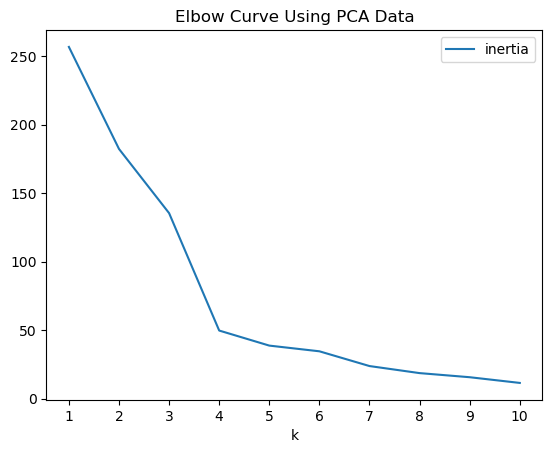

In [21]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_pca_df.plot.line(
    x="k", 
    y="inertia", 
    xticks=k, 
    title="Elbow Curve Using PCA Data"
)



#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, it's the same as using k value way which gave the same result of 4

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [22]:
# Initialize the K-Means model using the best value for k
model_pca = KMeans(n_clusters=4, n_init='auto', random_state=1)


In [23]:
# Fit the K-Means model using the PCA data
model_pca.fit(pca_df)


KMeans(n_clusters=4, random_state=1)

In [24]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predictions_pca = model_pca.predict(pca_df)


# Print the resulting array of cluster values.
predictions_pca


array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0],
      dtype=int32)

In [25]:
# Create a copy of the DataFrame with the PCA data
predicted_clustered_pca_df = pca_df.copy()


# Add a new column to the DataFrame with the predicted clusters
predicted_clustered_pca_df["crypto_cluster"] = model_pca.labels_


# Display sample data
predicted_clustered_pca_df.head(5)


,PCA1,PCA2,PCA3,crypto_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


<Axes: title={'center': 'Clusters of Cryptocurrencies Using PCA Data'}, xlabel='PCA1', ylabel='PCA2'>

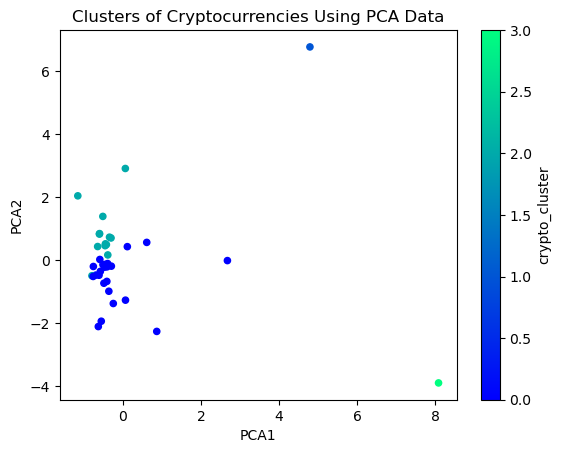

In [26]:
# Create a scatter plot by setting `x="PCA1"` and `y="PCA2"`. 
predicted_clustered_pca_df.plot.scatter(
    x="PCA1",
    y="PCA2",
    c="crypto_cluster",
    colormap="winter",
    title="Clusters of Cryptocurrencies Using PCA Data"
)


### Determine the Weights of Each Feature on each Principal Component

In [27]:
# Use the columns from the original scaled DataFrame as the index.
# Create a DataFrame with feature weights for each principal component
pc_weights_df = pd.DataFrame(
    data=pca.components_,
    columns=market_data_df.columns,
    index=['PC1', 'PC2', 'PC3']
)
pc_weights_df


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
PC1,-0.416728,-0.102432,-0.009162,0.191523,0.320365,0.594468,0.568379
PC2,0.358162,0.227432,0.540415,0.562182,0.434040,0.027735,-0.150789
PC3,-0.218795,0.787670,0.349534,-0.181744,-0.361377,0.039733,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
- For PC1 the strongest positive influence is price_change_percentage_200d with value = 0.594468, followed closely by price_change_percentage_1y with value = 0.568379
- For PC1 the strongest negative influence is price_change_percentage_24h with value = -0.416728

- For PC2 the strongest positive influence is price_change_percentage_30d with value = 0.562182, followed closely by price_change_percentage_14d with value = 0.540415
- FOR PC2 the strongest negative influence is price_change_percentage_1y with value = -0.150789

- For PC3 the strongest positive influence is price_change_percentage_7d with value = 0.787670
- For PC3 the strongest negative influence is price_change_percentage_60d with value = -0.361377

Usually the larger the absolute value of the weight, the more that feature contributes to the principal component. Which means:
- PC1 is most heavily influenced by longer-term price changes of 200 days and 1 year
- PC2 is most heavily influenced by mid-term price changes of 14 days and 30 days
- PC3 is most heavily influenced by shorter-term price changes of 7 days 
    